# Activity: Full OSEMN

## Introduction

In this assignment, you will work on a data analysis project. This project will
let you practice the skills you have learned in this course and write real code
in Python.

You will perform the following steps of the OSEMN framework:  
- [Scrub](#scrub)
- [Explore](#explore)
- [Interpret](#interpret)

In [1]:
# We'll import the libraries you'll likely use for this activity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('transactions-pet_store.csv')
df_orig = df.copy()

## Scrub

You will scrub the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

------

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 1

Remove all rows that have are missing either the `Product_Name` or the
`Product_Category`. Assign the cleaned DataFrame to the variable `df`
(overwriting the original DataFrame.).

In [2]:
# null rows for Product_Name column
pr_name_null = df.Product_Name.isnull()

#null values for Product_Category column
pr_name_cat = df.Product_Category.isnull()

df = df[(-pr_name_null )& (- pr_name_cat)]

# your code here

In [3]:
# Question 1 Grading Checks

assert df.shape[0] <= 2874, 'Did you remove all the rows with missing values for the columns Product_Name & Product_Category?'
assert df.shape[0] >= 2700, 'Did you remove too many the rows with missing values?'
assert len(df.columns) == 10, 'Make sure you do not drop any columns.'

#### Question 2

Find any clearly "incorrect" values in the `Price` column and "clean" the
DataFrame to address those values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [4]:
# Your code here
unique_price = df.Price.unique()
print(unique_price)

#When we print the unique price values, we notice two unusual entries.
value1 = -1.9873e+04
value2 = 1.9873e+04

#Let's filter out these values.
df = df[(df.Price != value1 )&(df.Price != value2)]


[ 3.9550e+01  2.6950e+01  2.3070e+01  2.8040e+01  1.3840e+01  1.8530e+01
  2.9660e+01  3.8170e+01  2.1820e+01  3.9240e+01  1.5340e+01  3.6300e+01
  1.0800e+01  3.4380e+01  2.9470e+01  3.0630e+01  1.9960e+01  1.7160e+01
  2.4530e+01  1.4530e+01  2.5480e+01  1.6710e+01  1.9873e+04  3.9320e+01
 -1.9873e+04]


In [5]:
# Question 2 Grading Checks

assert (df.Price < df.Price.quantile(0.0001)).sum() == 0, 'Check for very small values'
assert (df.Price > df.Price.quantile(0.999)).sum() == 0, 'Check for very large values'

#### Question 3

After you've done the cleaning above, remove any column that has more than `500`
missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [6]:
# Your code here


df = df.loc[:, -(df.isnull().sum()  > 500)]
print(len(df.columns))
# your code here

9


In [7]:
# Question 3 Grading Checks

assert len(df.columns) < 10, 'You should have dropped 1 or more columns (with more than 500 missing values)'

#### Question 4

Address the other missing values. You can replace the values or remvove them,
but whatever method you decide to clean the DataFrame, you should no longer have
any missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [8]:
# Your code here
mask = df.Customer_ID.isnull()




#We still have two columns containing null values: Customer_ID and Product_Category

#We aim to assign new Customer_IDs for the null values
df['Customer_ID'] = df['Customer_ID'].fillna(0)
col_index_cID = df.columns.get_loc('Customer_ID')
#we aim to asign new customer id's for nand ids 
for i in range(len(df)):
    if df.iloc[i,col_index_cID] == 0:
        df.loc[i, 'Customer_ID'] = 'new__id' +'i'
#lets fill Product_Categorty column
df['Product_Category'] = df['Product_Category'].fillna(df['Product_Category'].mode()[0])
df.isnull().sum()

Date                0
Order_Number        0
Customer_ID         0
Product_Name        0
SKU                 0
Price               0
Quantity            0
Product_Category    0
Product_Line        0
dtype: int64

In [9]:
# Question 4 Grading Checks

assert df.Customer_ID.isna().sum() == 0, 'Did you address all the missing values?'

## Explore

You will explore the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

You may use either exploratory statistics or exploratory visualizations to help
answer these questions.

------

Note that the DataFrame loaded for this section (in the below cell) is different
from the data you used in the [Scrub](#scrub) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

In [10]:
df = pd.read_csv('transactions-pet_store-clean.csv')

#### Question 5

Create a `Subtotal` column by multiplying the `Price` and `Quantity` values. 
This represents how much was spent for a given transaction (row).

In [11]:
# Your code here
df['Subtotal'] = df['Price']*df['Quantity']


# your code here

In [12]:
# Question 5 Grading Checks

assert 'Subtotal' in df.columns, ''

#### Question 6

Determine most common category (`Product_Category`) purchases (number of total
items) for both `Product_Line` categories. Assign the (string) name of these
categories to their respective variables `common_category_cat` & 
`common_category_dog`.

In [13]:
# Your code here
category_counts = df.groupby(['Product_Line', 'Product_Category']).size().reset_index(name='#Items')
print(category_counts)

common_category_dog = category_counts[category_counts['Product_Line'] == 'dog'].sort_values('#Items', ascending=False).iloc[0]['Product_Category']

common_category_cat = category_counts[category_counts['Product_Line'] == 'cat'].sort_values('#Items', ascending=False).iloc[0]['Product_Category']
print(common_category_dog)
print(common_category_cat)
# your code here

  Product_Line Product_Category  #Items
0          cat          bedding     263
1          cat             food     217
2          cat              toy     436
3          cat            treat     509
4          dog          bedding     470
5          dog             food     257
6          dog              toy     326
7          dog            treat     236
bedding
treat


In [14]:
# Question 6 Grading Checks

assert isinstance(common_category_dog, str), 'Ensure you assign the name of the category (string) to the variable common_category_dog'
assert isinstance(common_category_cat, str), 'Ensure you assign the name of the category (string) to the variable common_category_cat'

#### Question 7

Determine which categories (`Product_Category`), by `Product_Line` have the
***median*** highest `Price`.
Assign the (string) name of these categories to their respective variables
`priciest_category_cat` & `priciest_category_dog`.

In [15]:
# Your code here
categories_median = df.groupby(['Product_Category','Product_Line']).median().reset_index()
priciest_category_cat = categories_median[categories_median['Product_Line'] == 'cat'].sort_values('Price', ascending=False).iloc[0]['Product_Category']
priciest_category_dog = categories_median[categories_median['Product_Line'] == 'dog'].sort_values('Price', ascending=False).iloc[0]['Product_Category']

# your code here

In [16]:
# Question 7 Grading Checks

assert isinstance(priciest_category_dog, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_dog'
assert isinstance(priciest_category_cat, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_cat'

## Modeling

This is the point of the framework where we'd work on modeling with our data.
However, in this activity, we're going to move straight to interpretting.

## Interpret

You will interpret the data based on what you found so far. It's important that
you follow the directions as stated. Doing more or less than what is asked might
lead to not getting full points for the question.


------

Note that the DataFrame loaded for this section (in the below cell) is the same
as the data you used in the [Explore](#explore) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 8

You want to emphasize to your stakeholders that the total number of product
categories sold differ between the two `Product_Line` categories (`'cat'` & 
`'dog'`).

Create a **_horizontal_ bar plot** that has `Product_Category` on the y-axis and
the total number of that category sold (using the `Quantity`) by each 
`Product_Line` category. Also **change the axis labels** to something meaningful
and add a title.

You will likely want to use Seaborn. Make sure you set the result to the
variable `ax` like the following:
```python
ax = # code to create a bar plot
```

[Text(0.5, 0, ' Product categories'),
 Text(0, 0.5, 'Total number of items purchased'),
 None,
 Text(0.5, 1.0, 'Buying Patterns of Cat and Dog Lovers')]

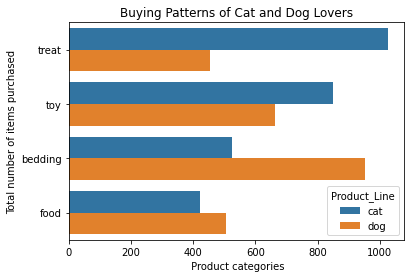

In [17]:
# Your code here
import seaborn as sns


ax = sns.barplot(x="Quantity", y="Product_Category", estimator =sum, hue = "Product_Line", data=df, ci=None )
ax.set(xlabel=' Product categories', ylabel='Total number of items purchased', label = "Customers" , title = 'Buying Patterns of Cat and Dog Lovers')

#, label="Buying Patterns of Cat and Dog Lovers in Special Product Categories",color="b"
# your code here

In [18]:
# Question 8 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'

#### Question 9

Based on the plot from [Question 8](#question-8), what would you conclude for
your stakeholders about what products they should sell? What would be the
considerations and/or caveats you'd communicate to your stakeholders?

Write at least a couple sentences of your thoughts in a string assigned to the
variable `answer_to_9`.

The cell below should look something like this:
```python
answer_to_9 = '''
I think that based on the visualization that ****.
Therefore I would communicate with the stakeholders that ****
'''
```

In [19]:
# Your code here
answer_to_9 = '''
I suggest increasing the stock of bedding for dogs, as dog lovers tend to purchase them frequently. 
For cat owners, it would be beneficial to increase the stock of cat treats, as these are more popular than toys.
Cat foods are bought less often, but offering discounts on them when cat treats are purchased could help boost sales.
'''
print(len(answer_to_9))
# your code here

333


In [20]:
# Question 9 Grading Checks

assert isinstance(answer_to_9, str), 'Make sure you create a string for your answer.'

#### Question 10

The plot you created for [Question 8](#question-8) is good but could be modified
to emphasize which products are important for the business.

Create an explanatory visualization that emphasizes the insight you about the
product category. This would be a visualization you'd share with the business
stakeholders.

Make sure you set the result to the variable `ax` like the following:
```python
ax = # code to create explanatory visualization
```

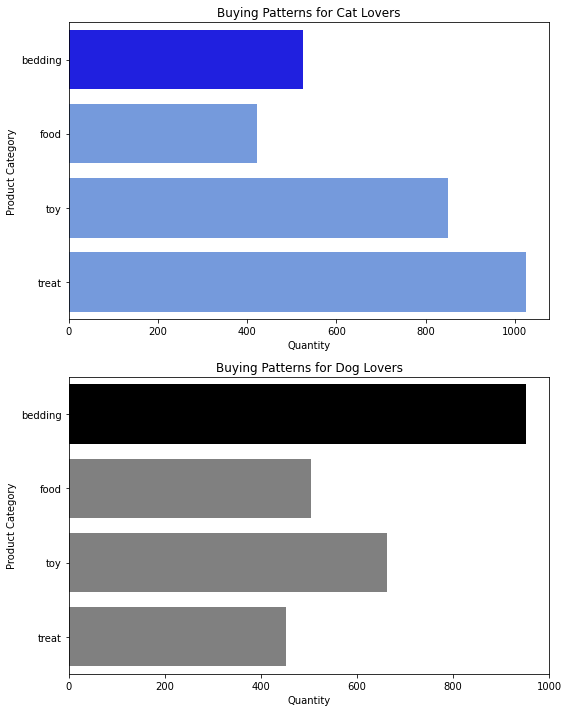

In [21]:
# Your code here
# Your code here

df.sort_values('Product_Category', inplace=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# First bar plot (Top) for 'cat' Product_Line
sns.barplot(data=df[df['Product_Line'] == 'cat'], x='Quantity', y='Product_Category',
            ci=None, estimator = sum, palette=["blue", "cornflowerblue", "cornflowerblue", "cornflowerblue"], ax=ax1)
ax1.set(xlabel='Quantity', ylabel='Product Category', title='Buying Patterns for Cat Lovers')

# Second bar plot (Bottom) for 'dog' Product_Line
sns.barplot(data=df[df['Product_Line'] == 'dog'], x='Quantity', y='Product_Category',
            ci=None, estimator = sum,palette=["black", "gray", "gray", "gray"], ax=ax2)
ax2.set(xlabel='Quantity', ylabel='Product Category', title='Buying Patterns for Dog Lovers')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# Question 10 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'